# Benchmark: Convex hull computation

Benchmark comparing Minimum Bounding Rectangle computation across:

* [georust/geo](https://lib.rs/crates/geo) crate
* The [geos C library](https://trac.osgeo.org/geos/), used through high-level Rust bindings via the [geos](https://lib.rs/crates/geos) crate

## Benchmarked operation

Each iteration computes the convex hull of the multi-polygon representing all districts of India a 1,000 times.

# Prerequisites

Generate data:

```sh
cd harness
cargo run --release --bin benchmark_convex_hull -- --out-file ../analysis/benchmark_convex_hull/data.json --geojson-file ../data/india_districts/polbnda_ind.geojson --headlong --iterations 100
```

### Loading data from /mnt/data/source/explore-georust/analysis/benchmark_convex_hull/data.json
### Statistics: Raw data
                  qps             
program           geo         geos
count       90.000000    90.000000
mean     31365.465185  1034.850038
std       4236.832638   123.034765
min      13173.854688   379.250615
25%      32352.918840  1040.668891
50%      32897.611640  1083.625784
75%      33149.698566  1095.647365
max      33496.333190  1109.965054


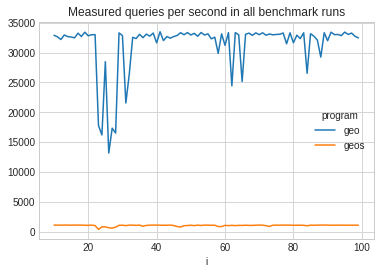

### Statistics: After outlier removal
                  qps             
program           geo         geos
count       83.000000    83.000000
mean     32373.334353  1062.082693
std       1747.892387    62.774521
min      24440.206241   805.384026
25%      32488.129694  1059.409609
50%      32917.169243  1084.914403
75%      33159.311534  1096.097620
max      33496.333190  1109.965054


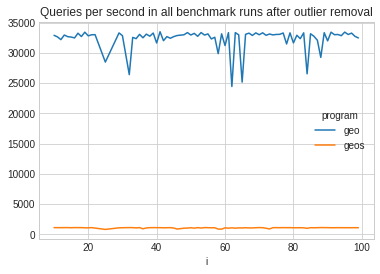

## Ratio of qps compared to geo
               qps
program       geos
count    83.000000
mean      0.032902
std       0.002673
min       0.025641
25%       0.032132
50%       0.033030
75%       0.033547
max       0.043596


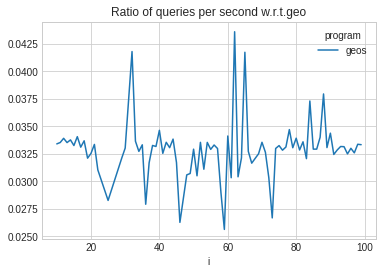

In [1]:
import os
data_absolute_path = os.path.join(os.getcwd(), 'data.json')
%run ../common/benchmark_analysis.ipynb

# Performance benchmarking

To generate the following SVG:

```bash
cd harness
cargo build --release

perf record -F 100 -g --call-graph dwarf -o ../analysis/benchmark_convex_hull/perf.data -- ./target/release/benchmark_convex_hull --geojson-file ../data/india_districts/polbnda_ind.geojson --out-file /dev/null --iterations 10 --headlong >/dev/null

cd ../analysis/benchmark_convex_hull
perf script -i perf.data | ../../third_party/stackcollapse-perf.pl > perf.collapsed-stacks.data
../../third_party/flamegraph.pl perf.collapsed-stacks.data > perf.svg
```

![](./perf.svg)

To dig in further, use
```
perf report -i perf.data --call-graph=fractal,0.5
```

# Further comparison

...work needed

geo::qhull algorithm seems fundamentally different from geos one. geos uses a two step algorithm. Spends half the time converting to a RO format, and half the time computing convex hull.